<a href="https://colab.research.google.com/github/subhprakash/Gold-reserve-prediction/blob/main/PROJECT(India).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/Gold Reserve India.csv')

# Clean column names by removing any extra whitespace
data.columns = data.columns.str.strip()

# Convert specific columns to numeric where necessary, handling errors
numeric_columns = ['GDP (Billions USD)', 'Growth Rate (%)', 'GDP from Gold']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Extract the year from 'Years/Domains' column and convert to integer
data['Year'] = data['Years/Domains'].str.extract(r'(\d+)').astype(int)

# Exclude non-numeric columns when filling missing values
data_numeric = data.select_dtypes(include=[np.number])
data[data_numeric.columns] = data_numeric.fillna(data_numeric.mean())

# Display the cleaned data
print(data.head())

   Years/Domains  Total    Banks  Temples  Healthcare    I.T.   Waste  \
0  2024 (Tonnes)  804.0  594.960  144.720      16.080  16.080  32.160   
1  2023 (Tonnes)  794.6  588.004  143.028      15.892  15.892  31.748   
2  2022 (Tonnes)  787.4  582.676  141.732      15.748  15.748  31.496   
3  2021 (Tonnes)  754.1  558.034  135.738      15.082  15.082  30.164   
4  2020 (Tonnes)  676.6  500.684  121.788      13.532  13.532  27.064   

   GDP (Billions USD)  Growth Rate (%)  GDP from Gold  Year  
0         3047.341667             4.80      164.55627  2024  
1         3549.920000             7.58      191.69460  2023  
2         3353.470000             6.99      181.08738  2022  
3         3167.270000             9.69      171.03258  2021  
4         2674.850000            -5.78      144.44190  2020  


This notebook analyzes gold reserves data, GDP, and growth rates, and explores their relationships through various models and scenarios.

### 1. Data Loading and Cleaning (`YCnt2UcJMeBh`)

First, the notebook loads the `Gold Reserve India.csv` dataset. It then performs several cleaning steps:
- **Column Name Cleaning**: Removes extra whitespace from column names.
- **Data Type Conversion**: Converts specific columns ('GDP (Billions USD)', 'Growth Rate (%)', 'GDP from Gold') to numeric, coercing errors to `NaN`.
- **Year Extraction**: Extracts the year from the 'Years/Domains' column and converts it to an integer.
- **Missing Value Imputation**: Fills missing numeric values with the mean of their respective columns.

This ensures the data is in a suitable format for analysis and modeling.

### 2. Linear Regression for 2025 Predictions (`y9TAx_EBNPx3`)

This section uses `LinearRegression` to predict various gold reserve categories and economic indicators for the year 2025.
- **Features and Targets**: 'Year' is used as the feature, and several columns like 'Total', 'Banks', 'Temples', 'GDP (Billions USD)', etc., are set as targets.
- **Model Training and Prediction**: A separate linear regression model is trained for each target variable using the historical data. These models are then used to predict the values for the year 2025.

The output shows the predicted values for 2025 for each of these categories.

### 3. Decision Tree Regressor for Total Gold Reserves (`QrDeajFEOPWO`)

Here, a `DecisionTreeRegressor` is employed to model and understand the relationship between the 'Year' and 'Total' gold reserves.
- **Model Training**: A decision tree model is trained using 'Year' to predict 'Total' gold reserves.
- **R-squared Calculation**: The R-squared value is calculated to assess the model's accuracy, indicating how well the model explains the variance in 'Total' gold reserves.
- **Visualization**: The trained decision tree is plotted, providing a visual representation of how the model makes predictions based on the year.

### 4. Data Visualization (`SuNThTo0OoZ1`)

This section focuses on visualizing the trend of 'Total' gold reserves over the years.
- **Time Series Plot**: A line plot displays the 'Total' gold reserves against the 'Year', allowing for an easy visual inspection of the trend and any patterns in gold reserves over time.

### 5. Ridge Regression for GDP Prediction and Scenario Analysis (`9plDY0cHVJkb`)

This is a more advanced analysis that uses `Ridge` regression to understand how different gold reserve categories influence GDP, and then explores hypothetical reallocation scenarios.
- **Data Preparation**: The data is cleaned again, specifically removing rows with missing 'GDP (Billions USD)' values, and features are standardized using `StandardScaler`.
- **Ridge Model Training**: A Ridge regression model is trained to predict 'GDP (Billions USD)' based on various gold reserve categories ('Total', 'Banks', 'Temples', 'Healthcare', 'I.T.', 'Waste'). Ridge regression is used to prevent overfitting.
- **Model Evaluation**: The Root Mean Squared Error (RMSE) is calculated to quantify the model's prediction accuracy.
- **Feature Coefficients**: The coefficients of the Ridge model are displayed, showing the estimated impact of each gold reserve category on GDP.
- **Scenario Analysis**: Two hypothetical scenarios are created:
    - **Scenario 1**: Reallocating all 'Waste' gold reserves to 'Healthcare'.
    - **Scenario 2**: Reallocating all 'Waste' gold reserves to 'I.T.'.
- **Predicted GDP**: The model predicts the GDP under these modified scenarios, allowing for a comparison of the potential economic impact of such reallocations.

In essence, the notebook progresses from basic data preparation and linear forecasting to more complex modeling and scenario-based predictive analysis to gain insights into gold reserves and their economic implications.

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Define features (Year) and targets
features = ['Year']
targets = ['Total', 'Banks', 'Temples', 'Healthcare', 'I.T.', 'Waste', 'GDP (Billions USD)', 'Growth Rate (%)', 'GDP from Gold']

# Dictionary to store predictions for 2025
predictions = {}

# Convert the input year 2025 into a DataFrame with column names
predict_input = pd.DataFrame([[2025]], columns=features)

# Loop over each target variable, fit the model, and predict for 2025
for target in targets:
    model = LinearRegression()
    model.fit(data[features], data[target])
    prediction = model.predict(predict_input)[0]
    predictions[target] = prediction

# Display the predictions for 2025
print("Predictions for 2025:", predictions)


Predictions for 2025: {'Total': 870.4257142857095, 'Banks': 644.115028571432, 'Temples': 156.67662857142932, 'Healthcare': 17.40851428571432, 'I.T.': 17.40851428571432, 'Waste': 34.801600000000235, 'GDP (Billions USD)': 3495.9809523809527, 'Growth Rate (%)': 6.9771428571427805, 'GDP from Gold': 188.78240571428432}


Decision Tree R-squared: 1.0


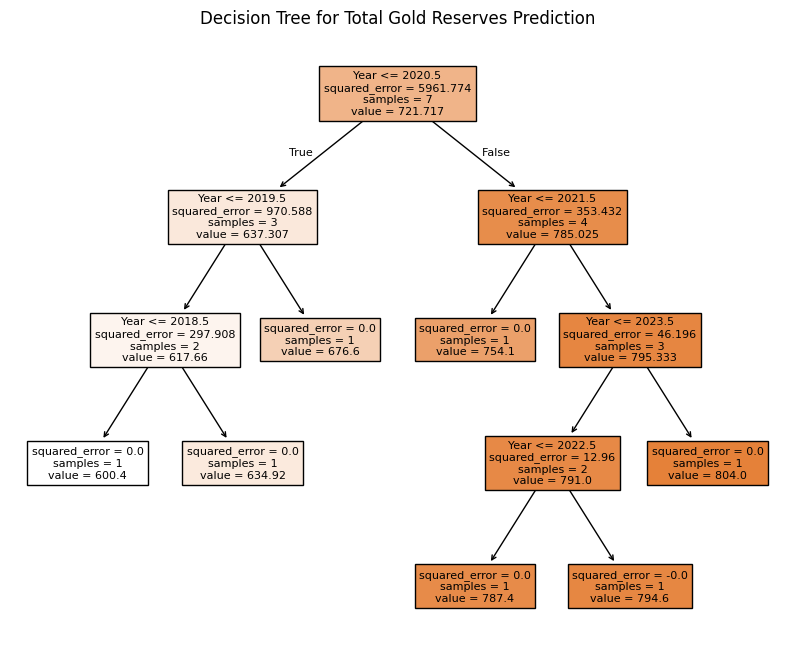

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Regressor to predict 'Total' based on 'Year's
tree_model = DecisionTreeRegressor()
tree_model.fit(data[['Year']], data['Total'])

# Make predictions on the training data to evaluate performance
y_true = data['Total']
y_pred = tree_model.predict(data[['Year']])

# Calculate R-squared for accuracy
r_squared = r2_score(y_true, y_pred)

print("Decision Tree R-squared:", r_squared)

# Plot the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(tree_model, feature_names=['Year'], filled=True)
plt.title("Decision Tree for Total Gold Reserves Prediction")
plt.show()


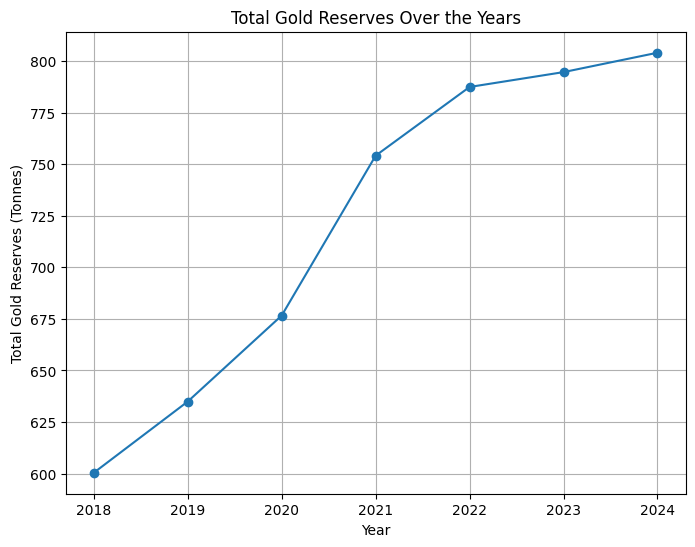

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Total Gold Reserves over the years
plt.figure(figsize=(8, 6))
plt.plot(data['Year'], data['Total'], marker='o')
plt.title("Total Gold Reserves Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Gold Reserves (Tonnes)")
plt.grid(True)
plt.show()

# # Scatter plot of GDP vs. Growth Rate
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=data['GDP (Billions USD)'], y=data['Growth Rate (%)'])
# plt.title("GDP vs. Growth Rate")
# plt.xlabel("GDP (Billions USD)")
# plt.ylabel("Growth Rate (%)")
# plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Clean and prepare data
data.columns = data.columns.str.strip()  # Remove whitespace from column names
data.dropna(subset=['GDP (Billions USD)'], inplace=True)  # Remove rows with missing GDP values

# Define features and target for the original scenario
X = data[['Total', 'Banks', 'Temples', 'Healthcare', 'I.T.', 'Waste']]
y = data['GDP (Billions USD)']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a Ridge regression model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate model on test set
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)**0.5
print("Model RMSE:", rmse)

# Check coefficients to see their impact on GDP
feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})
print("Feature Coefficients:")
print(feature_coefficients)

# Prepare modified copies of the data for different scenarios
# Scenario 1: Reallocate Waste to Healthcare
data_scenario_healthcare = data.copy()
data_scenario_healthcare['Healthcare'] += data_scenario_healthcare['Waste']
data_scenario_healthcare['Waste'] = 0

# Scenario 2: Reallocate Waste to IT
data_scenario_it = data.copy()
data_scenario_it['I.T.'] += data_scenario_it['Waste']
data_scenario_it['Waste'] = 0

# Standardize the modified scenario features
X_scenario_healthcare = scaler.transform(data_scenario_healthcare[['Total', 'Banks', 'Temples', 'Healthcare', 'I.T.', 'Waste']])
X_scenario_it = scaler.transform(data_scenario_it[['Total', 'Banks', 'Temples', 'Healthcare', 'I.T.', 'Waste']])

# Predict GDP under new scenarios
data['Predicted GDP (Healthcare + Waste)'] = ridge_model.predict(X_scenario_healthcare)
data['Predicted GDP (IT + Waste)'] = ridge_model.predict(X_scenario_it)

# Display the comparison of predicted GDP in different scenarios
print("\nPredicted GDP with original data:")
print(data[['Years/Domains', 'GDP (Billions USD)', 'Predicted GDP (Healthcare + Waste)', 'Predicted GDP (IT + Waste)']])


Model RMSE: 102.16488350752655
Feature Coefficients:
      Feature  Coefficient
0       Total    42.520420
1       Banks    42.520420
2     Temples    42.520420
3  Healthcare    42.520420
4        I.T.    42.520420
5       Waste    39.156213

Predicted GDP with original data:
   Years/Domains  GDP (Billions USD)  Predicted GDP (Healthcare + Waste)  \
0  2024 (Tonnes)         3047.341667                         3764.306135   
1  2023 (Tonnes)         3549.920000                         3727.079267   
2  2022 (Tonnes)         3353.470000                         3700.315572   
3  2021 (Tonnes)         3167.270000                         3571.948960   
4  2020 (Tonnes)         2674.850000                         3273.197836   
5  2019 (Tonnes)         2835.610000                         3112.527555   
6  2018 (Tonnes)         2702.930000                         2979.458022   

   Predicted GDP (IT + Waste)  
0                 3764.306135  
1                 3727.079267  
2                 